In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import pandas as pd
import glob

path = r'D:\MIS\Research\Data Analytics\TOI_Customer\TOI_DP\Input_Data\result\New01' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.dtypes

CUSTOMER_CDE          int64
SUB_INDUSTRY_CDE      int64
CUS_TARGET_CDE        int64
GENDER_CDE           object
PROVINCE_CDE        float64
AREA                 object
MARITAL_STATUS       object
BANK_RELATION         int64
AGE                   int64
TOI_DP_2016         float64
TOI_DP_2017         float64
TOI_DP_2018         float64
TOI_DP_2019         float64
PRODUCT              object
RATE_TERM            object
dtype: object

In [ ]:
frame.shape

In [ ]:
frame.head()

In [4]:
frame.isnull().sum()

CUSTOMER_CDE              0
SUB_INDUSTRY_CDE          0
CUS_TARGET_CDE            0
GENDER_CDE                0
PROVINCE_CDE          42593
AREA                5688694
MARITAL_STATUS            0
BANK_RELATION             0
AGE                       0
TOI_DP_2016         6973670
TOI_DP_2017         6446641
TOI_DP_2018         5688694
TOI_DP_2019         5626193
PRODUCT             6272931
RATE_TERM           6272931
dtype: int64

In [ ]:
frame.info()

In [ ]:
frame.describe()

In [ ]:
frame[(frame.TOI_DP_2018.isnull()==True) & (frame.TOI_DP_2017.isnull()==True) & (frame.TOI_DP_2016.isnull()==True) \
      & (frame.PRODUCT.isnull()==True) & (frame.RATE_TERM.isnull()==True)].count()

In [ ]:
frame[(frame.PROVINCE_CDE == -1)]['PROVINCE_CDE'].count()

In [8]:
frame[(frame.AREA == ' ')]['AREA'].count()

0

In [ ]:
frame.groupby('MARITAL_STATUS')['MARITAL_STATUS'].count().reset_index(name='count').sort_values(['count'],ascending=False)

In [3]:
frame.loc[frame.MARITAL_STATUS == ' ','MARITAL_STATUS'] = 'OTHER'

In [4]:
frame.loc[(frame.MARITAL_STATUS=='IM1421703562'),'MARITAL_STATUS']='OTHER'

In [5]:
df = frame

In [6]:
df['TOIDP_CLASS'] = 0

In [7]:
df.loc[df.TOI_DP_2018.isnull()==False,'TOIDP_CLASS'] = 1

In [8]:
g = df.groupby('TOIDP_CLASS')
g.groups.keys()

dict_keys([0, 1])

In [28]:
df.groupby('MARITAL_STATUS')['MARITAL_STATUS'].count().reset_index(name='count').sort_values(['count'],ascending=False).head()

,MARITAL_STATUS,count
2,OTHER,5611579
1,MARRIED,3535636
4,SINGLE,1720520
0,DIVORCED,1878
3,PARTNER,670


In [11]:
df.groupby('PROVINCE_CDE')['PROVINCE_CDE'].count().reset_index(name='count').sort_values(['count'],ascending=False).head()

,PROVINCE_CDE,count
43,5000.0,2544210
0,1000.0,680741
80,6800.0,374962
84,7400.0,374778
91,8200.0,295368


In [9]:
df["PROVINCE_CDE"].fillna(method='ffill', inplace = True)

In [10]:
df['HISTORY_TOIDP'] = 0

In [11]:
df['PREDICT_TOIDP'] = 0

In [12]:
df.loc[(df.TOI_DP_2016.isnull()==False) & (df.TOI_DP_2017.isnull()==False),'HISTORY_TOIDP'] = 2
df.loc[(df.TOI_DP_2016.isnull()==True) & (df.TOI_DP_2017.isnull()==False),'HISTORY_TOIDP'] = 1
df.loc[(df.TOI_DP_2016.isnull()==False) & (df.TOI_DP_2017.isnull()==True),'HISTORY_TOIDP'] = 1

In [13]:
df.loc[df.TOI_DP_2019.isnull()==False,'PREDICT_TOIDP'] = 1

In [14]:
g = df.groupby('PREDICT_TOIDP')
g.groups.keys()

dict_keys([0, 1])

In [15]:
data_class = df[['SUB_INDUSTRY_CDE','CUS_TARGET_CDE','GENDER_CDE','PROVINCE_CDE','MARITAL_STATUS','BANK_RELATION','AGE','HISTORY_TOIDP','TOIDP_CLASS']]

In [19]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870323 entries, 0 to 10870322
Data columns (total 9 columns):
SUB_INDUSTRY_CDE    int64
CUS_TARGET_CDE      int64
GENDER_CDE          object
PROVINCE_CDE        float64
MARITAL_STATUS      object
BANK_RELATION       int64
AGE                 int64
HISTORY_TOIDP       int64
TOIDP_CLASS         int64
dtypes: float64(1), int64(6), object(2)
memory usage: 746.4+ MB


In [20]:
data_class.isnull().sum()

SUB_INDUSTRY_CDE    0
CUS_TARGET_CDE      0
GENDER_CDE          0
PROVINCE_CDE        0
MARITAL_STATUS      0
BANK_RELATION       0
AGE                 0
HISTORY_TOIDP       0
TOIDP_CLASS         0
dtype: int64

In [23]:
data_class.head()

,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,HISTORY_TOIDP,TOIDP_CLASS
0,9001,2004,FEMALE,5000.0,OTHER,5,76,2,1
1,4241,2004,FEMALE,5000.0,OTHER,5,51,0,0
2,7311,2004,FEMALE,5000.0,OTHER,-1,63,2,1
3,4241,2001,MALE,6200.0,OTHER,8,28,0,0
4,1571,2001,MALE,5000.0,MARRIED,5,31,1,1


In [24]:
data_class.groupby('BANK_RELATION')['BANK_RELATION'].count().reset_index(name='count').sort_values(['BANK_RELATION'],ascending=True)

,BANK_RELATION,count
0,-1,303651
1,1,4870
2,2,9565
3,3,2317
4,4,31182
5,5,8313376
6,6,5500
7,7,11
8,8,2199750
9,9,20


In [25]:
data_class[(data_class.AGE<=0)].count()

SUB_INDUSTRY_CDE    900
CUS_TARGET_CDE      900
GENDER_CDE          900
PROVINCE_CDE        900
MARITAL_STATUS      900
BANK_RELATION       900
AGE                 900
HISTORY_TOIDP       900
TOIDP_CLASS         900
dtype: int64

In [26]:
data_class[(data_class.AGE>99)].count()

SUB_INDUSTRY_CDE    2229
CUS_TARGET_CDE      2229
GENDER_CDE          2229
PROVINCE_CDE        2229
MARITAL_STATUS      2229
BANK_RELATION       2229
AGE                 2229
HISTORY_TOIDP       2229
TOIDP_CLASS         2229
dtype: int64

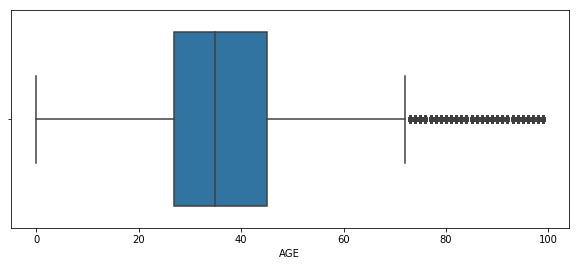

In [32]:
# Outlier Analysis

fig, axs = pyplot.subplots(figsize = (10,4))
plt = sns.boxplot(data_class['AGE'], ax = axs)

In [16]:
median = data_class.loc[data_class['AGE']<=100,'AGE'].median()

In [17]:
median

35.0

In [18]:
data_class['AGE'] = np.where(data_class['AGE'] >= 100,median,data_class['AGE'])

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Data visualation

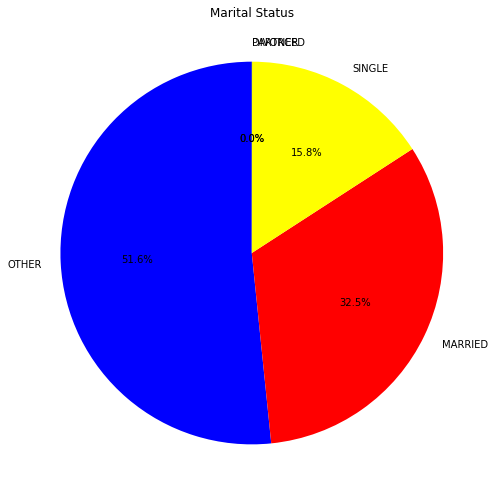

In [19]:
# sum the instances of males and females
OTHER = (data_class['MARITAL_STATUS'] == 'OTHER').sum()
MARRIED = (data_class['MARITAL_STATUS'] == 'MARRIED').sum()
SINGLE = (data_class['MARITAL_STATUS'] == 'SINGLE').sum()
DIVORCED = (data_class['MARITAL_STATUS'] == 'DIVORCED').sum()
PARTNER = (data_class['MARITAL_STATUS'] == 'PARTNER').sum()

# put them into a list called proportions
proportions = [OTHER, MARRIED, SINGLE, DIVORCED, PARTNER]
fig1,ax1 = plt.subplots(figsize=(7,7))
# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['OTHER', 'MARRIED', 'SINGLE', 'DIVORCED', 'PARTNER'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red','yellow','green','purple'],
    
    # with one slide exploded out
#     explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,    
    # with the percent listed as a fraction
    autopct = '%1.1f%%',    
    explode=None
    )

# View the plot drop above
ax1.axis('equal')

# Set labels
plt.title("Marital Status")

# View the plot
plt.tight_layout()
plt.show()

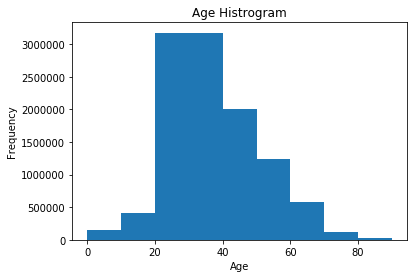

In [38]:
# sort the values from the top to the least value and slice the first 5 items
df = data_class.AGE.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,100,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histrogram')

# show the plot
plt.show()

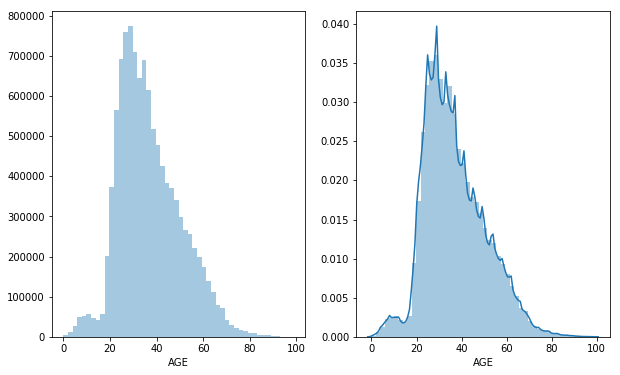

In [39]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
# sb.set()
sns.distplot(data_class.AGE,kde=False)
plt.subplot(1,2,2)
sns.distplot(data_class.AGE)
plt.show()

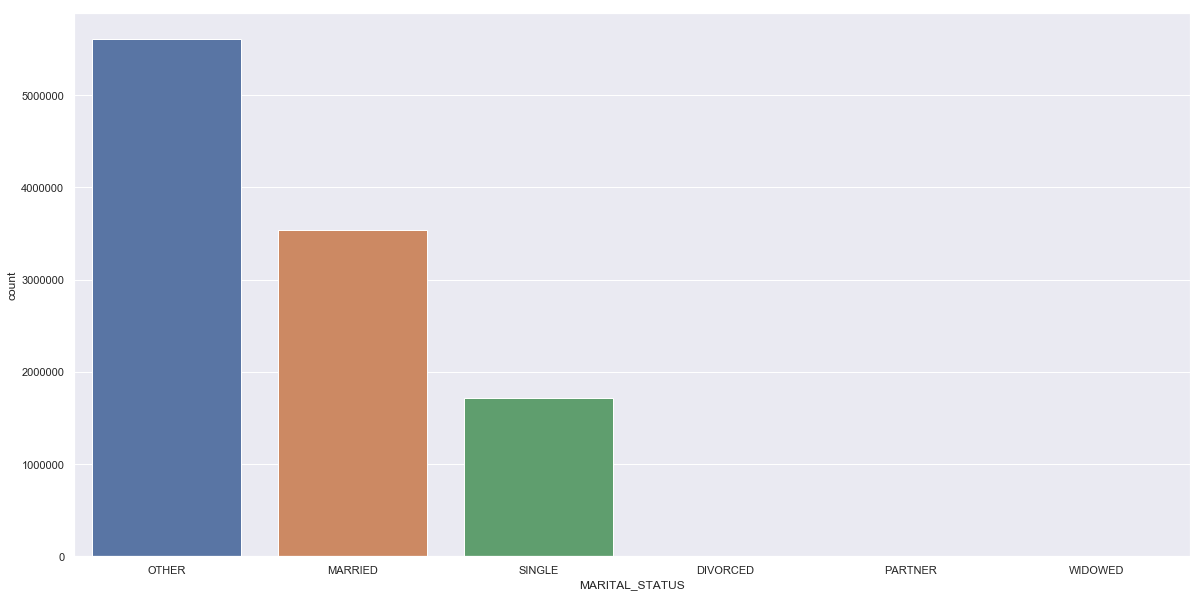

In [42]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(20,10))

ax=sns.countplot(x=data_class.MARITAL_STATUS,data=data_class)

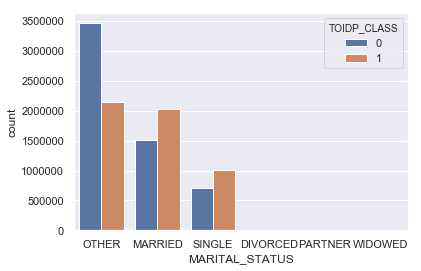

In [43]:
ax = sns.countplot(x=data_class.MARITAL_STATUS,hue=data_class.TOIDP_CLASS, data =data_class )

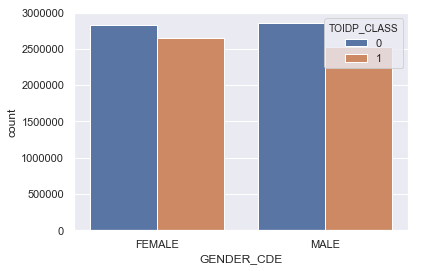

In [44]:
ax = sns.countplot(x=data_class.GENDER_CDE,hue=data_class.TOIDP_CLASS, data =data_class )

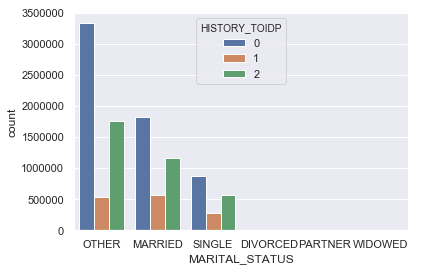

In [45]:
# HISTORY_TOIDP
ax = sns.countplot(x=data_class.MARITAL_STATUS,hue=data_class.HISTORY_TOIDP, data =data_class )

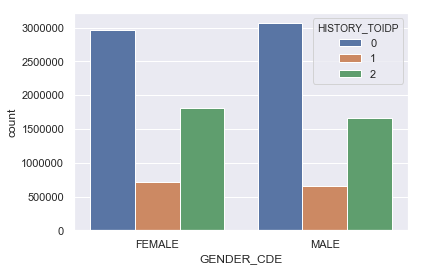

In [46]:
ax = sns.countplot(x=data_class.GENDER_CDE,hue=data_class.HISTORY_TOIDP, data =data_class )

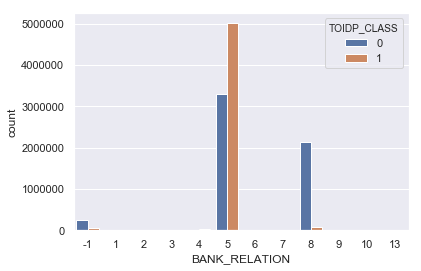

In [47]:
ax = sns.countplot(x=data_class.BANK_RELATION,hue=data_class.TOIDP_CLASS, data =data_class )

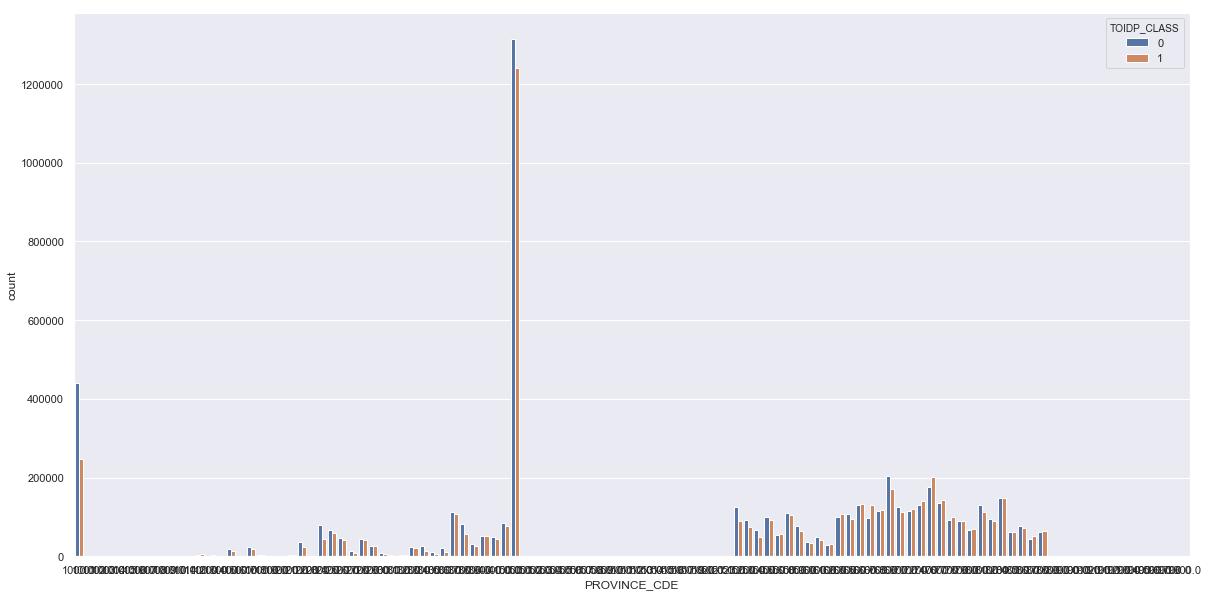

In [50]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x=data_class.PROVINCE_CDE,hue=data_class.TOIDP_CLASS, data =data_class )

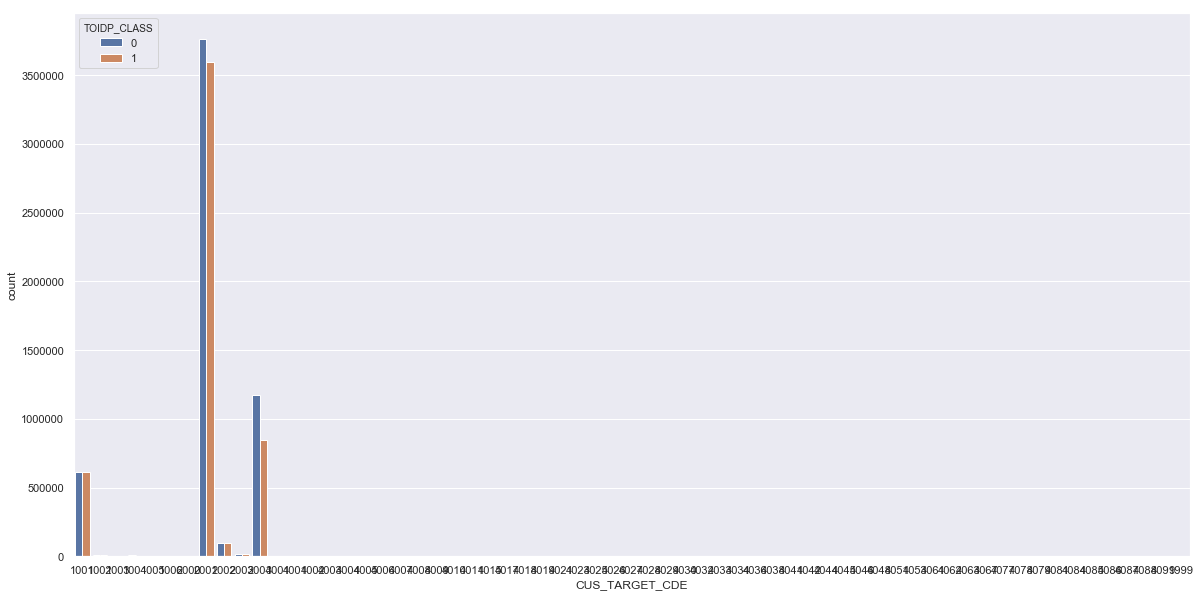

In [51]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x=data_class.CUS_TARGET_CDE,hue=data_class.TOIDP_CLASS, data =data_class )

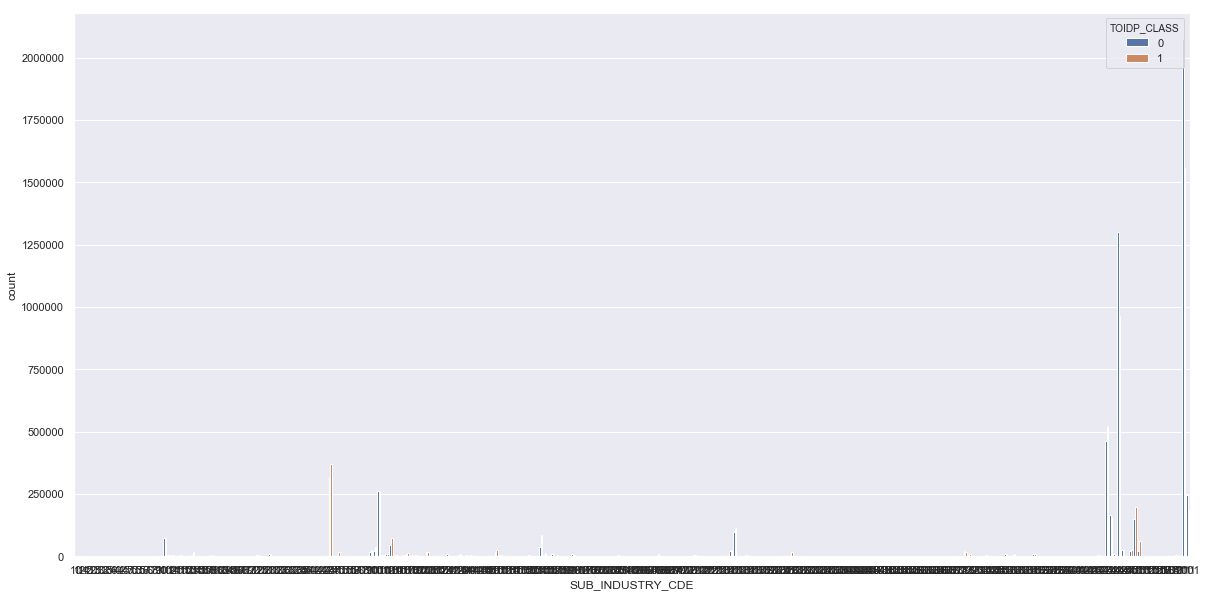

In [53]:
# SUB_INDUSTRY_CDE
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x=data_class.SUB_INDUSTRY_CDE,hue=data_class.TOIDP_CLASS, data =data_class )

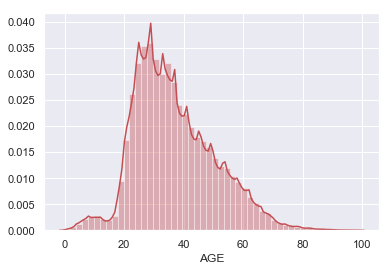

In [54]:
#Distribution plot
sns.set(color_codes=True)
sns.distplot(data_class.AGE,color = 'r')
plt.show()

In [ ]:
# sns.set()
# sns.set_palette('Dark2')
# plot = sns.swarmplot(x=data_class.TOIDP_CLASS, y=data_class.AGE, data=data_class)
# plot.set_title('Deposit Customer by AGE',fontsize=12,color='red')
# plt.show()

In [20]:
#Randomforest method
X = data_class.drop('TOIDP_CLASS', axis=1)  
y = data_class['TOIDP_CLASS'] 
x_pred = df['PREDICT_TOIDP']

In [21]:
X.shape

(10870323, 8)

In [50]:
X.head()

,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,HISTORY_TOIDP,AGE_RANGE
0,9001,2004,0,5000,2,5,2,3
1,4241,2004,0,5000,2,5,0,2
2,7311,2004,0,5000,2,-1,2,3
3,4241,2001,1,6200,2,8,0,1
4,1571,2001,1,5000,1,5,1,1


In [22]:
x_pred.shape

(10870323,)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870323 entries, 0 to 10870322
Data columns (total 8 columns):
SUB_INDUSTRY_CDE    int64
CUS_TARGET_CDE      int64
GENDER_CDE          object
PROVINCE_CDE        float64
MARITAL_STATUS      object
BANK_RELATION       int64
HISTORY_TOIDP       int64
AGE_RANGE           float64
dtypes: float64(2), int64(4), object(2)
memory usage: 663.5+ MB


In [37]:
data_class2 = data_class

In [38]:
data_class2['AGE_RANGE'] = pd.cut(data_class2.AGE,bins=[0,20,40,60,80,np.inf],labels=False, right=True)

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
data_class2.drop(['AGE'],axis=1, inplace = True)

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
X['AGE_RANGE'] = pd.cut(X.AGE,bins=[0,20,40,60,80,np.inf],labels=False, right=True)

In [25]:
X.drop(['AGE'],axis=1, inplace = True)


In [35]:
X.groupby('AGE_RANGE')['AGE_RANGE'].count().reset_index(name='count').sort_values(['count'],ascending=False).head()

,AGE_RANGE,count
1,1,6412013
2,2,3085054
0,0,723032
3,3,619328
4,4,30896


In [33]:
X['AGE_RANGE'] = X['AGE_RANGE'].fillna(0)

In [34]:
X['AGE_RANGE'] = X['AGE_RANGE'].astype(int)

In [43]:
X['PROVINCE_CDE'] = X['PROVINCE_CDE'].astype(int)

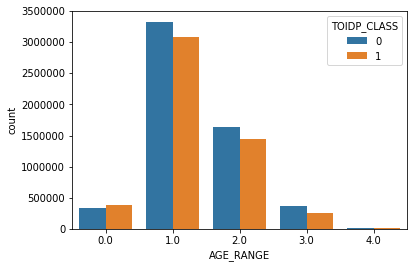

In [40]:
ax = sns.countplot(x=data_class2.AGE_RANGE,hue=data_class2.TOIDP_CLASS, data =data_class2 )

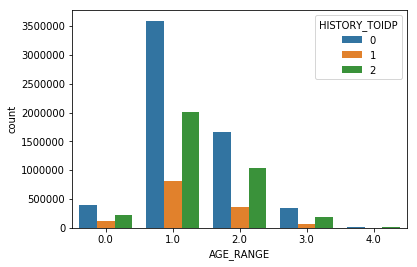

In [41]:
ax = sns.countplot(x=data_class2.AGE_RANGE,hue=data_class2.HISTORY_TOIDP, data =data_class2 )

In [46]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [47]:
X['GENDER_CDE'] = le.fit_transform(X['GENDER_CDE'])

In [49]:
X['MARITAL_STATUS'] = le.fit_transform(X['MARITAL_STATUS'])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 10)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(8696258, 8) 8696258
(2174065, 8) (2174065,)


# RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300
                            ,min_impurity_decrease = 0.002
                            , min_samples_split = 30)
# fit data to the model
rf.fit(X_train, y_train)

In [75]:
p_predict = rf.predict_proba(X_test)[:,1]
predictions = [1 if v > 0.6 else 0 for v in p_predict]

In [76]:
#evaluation
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1023853  112646]
 [ 197330  840236]]


In [77]:
# Precision
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Precision: {:.2f}'.format(precision_score(y_test,predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,predictions)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))

Precision: 0.88
Recall: 0.81
Accuracy: 0.86


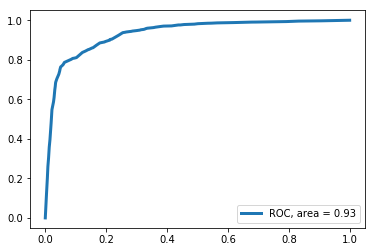

In [78]:
# ROC: Receiving Operation Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, p_predict)
auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw = 3, label = "ROC, area = {:0.2f}".format(auc))
plt.legend()